11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1038 - val_loss: 0.0499
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0468 - val_loss: 0.0382
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0371 - val_loss: 0.0325
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0317 - val_loss: 0.0282
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0279 - val_loss: 0.0256
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0255 - val_loss: 0.0239
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0238 - val_loss: 0.0227
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0221 - val_loss: 0.0214
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0216 - val_loss: 0.0211
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step


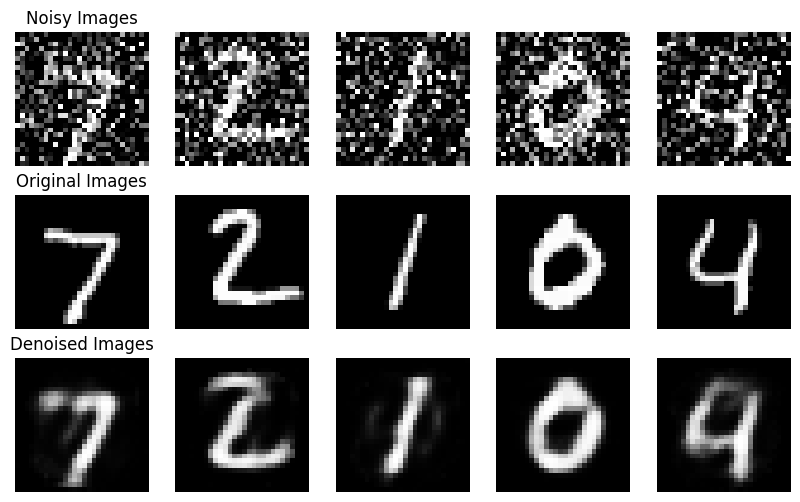

In [1]:
#-------------------------------------------------------------------------
# Denoising Autoencoders  
# Chapter 7 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# License:  MIT - Citation of this work required
#-------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input, Dense
#-------------------------------------------------------------------------

# Add Gaussian noise function
def add_noise(x, noise_factor=0.5):
    Noise = x + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x.shape)
    return Noise
#-------------------------------------------------------------------------

# Load MNIST dataset (as an example)
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 784)  # Flattening
x_test = x_test.reshape(-1, 784)

# Add noise to the dataset
x_train_noisy = add_noise(x_train, noise_factor=0.5)
x_test_noisy = add_noise(x_test, noise_factor=0.5)

# Ensure values are within [0,1]
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

#-------------------------------------------------------------------------
# Define Autoencoder Structure
input_dim    = 784  # MNIST images (28x28 flattened)
encoding_dim =  32  # Latent space dimensionality

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder Model
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

#-------------------------------------------------------------------------
# Visualizing the Results
n = 5  # Number of images to display
decoded_imgs = autoencoder.predict(x_test_noisy)

plt.figure(figsize=(10, 6))
for i in range(n):
    # Noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    if i == 0:
        ax.set_title("Noisy Images")

    # Original images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    if i == 0:
        ax.set_title("Original Images")

    # Reconstructed (Denoised) images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
    if i == 0:
        ax.set_title("Denoised Images")

plt.show()
